from sklearn.svm import SVR
model=SVR(kernel='poly')

#훈련 데이터로 모델 훈련
model.fit(X_train_scaled, y_train)
#모델 예측값 저장
pred_train=model.predict(X_test_scaled)
#정확도 추출
pred_train

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [5]:
df = pd.read_csv('./train.csv')

In [7]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [9]:
df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

for a in [df]:
    a['year'] = a['date'].dt.year
    a['month'] = a['date'].dt.month
    a['day'] = a['date'].dt.day
    a['dayofweek'] = a['date'].dt.dayofweek

# 날짜 컬럼 삭제 (모델링에 필요 없으므로)
df.drop('date', axis=1, inplace=True)

In [15]:
df['family'] = df['family'].astype('category')
df['family_encoded'] = df['family'].cat.codes
a = df['family']

df

,id,store_nbr,family,sales,onpromotion,year,month,day,dayofweek,family_encoded
0,0,1,AUTOMOTIVE,0.000,0,2013,1,1,1,0
1,1,1,BABY CARE,0.000,0,2013,1,1,1,1
2,2,1,BEAUTY,0.000,0,2013,1,1,1,2
3,3,1,BEVERAGES,0.000,0,2013,1,1,1,3
4,4,1,BOOKS,0.000,0,2013,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,9,POULTRY,438.133,0,2017,8,15,1,28
3000884,3000884,9,PREPARED FOODS,154.553,1,2017,8,15,1,29
3000885,3000885,9,PRODUCE,2419.729,148,2017,8,15,1,30
3000886,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,31


In [17]:
df.drop('family',axis=1,inplace=True)

In [19]:
y = df['sales']
df.drop('sales', axis=1,inplace=True)
X=df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
model=SVR(kernel='poly',C=)

In [72]:
X_sample = X_train_scaled[:10000]
y_sample = y_train[:10000]
model.fit(X_sample, y_sample)

SVR(C=1000, kernel='poly')

In [73]:
pred_train=model.predict(X_sample)
pred_train

array([ 53.18266991,  61.84279521, -11.5888358 , ...,  16.49748698,
        64.0758396 ,  26.05834161])

In [76]:
from sklearn.metrics import root_mean_squared_error, r2_score

test_sample=y_test[:10000]
mae = root_mean_squared_error(test_sample, pred_train)  # RMSE
mse = root_mean_squared_error(test_sample, pred_train)
r2 = r2_score(test_sample, pred_train)

In [78]:
mae

1234.4960614763481

In [80]:
mse

1234.4960614763481

In [82]:
r2

-0.17177384789225592

In [21]:
from sklearn.metrics import root_mean_squared_error, r2_score
mse_scores = []
r2_scores = []

# ✅ C 값을 바꿔가며 학습 및 평가
for x in range (1, 100, 2):

    model=SVR(kernel='poly',C=x)

    X_sample = X_train_scaled[:10000]
    y_sample = y_train[:10000]
    model.fit(X_sample, y_sample)
    
    pred_train=model.predict(X_sample)
    pred_train
    
    test_sample=y_test[:10000]
    mae = root_mean_squared_error(test_sample, pred_train)  # RMSE
    mse = root_mean_squared_error(test_sample, pred_train)
    r2 = r2_score(test_sample, pred_train)

    mse_scores.append(mse)
    r2_scores.append(r2) 

In [25]:
C_values = [x for x in range(1, 100, 2)]

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure

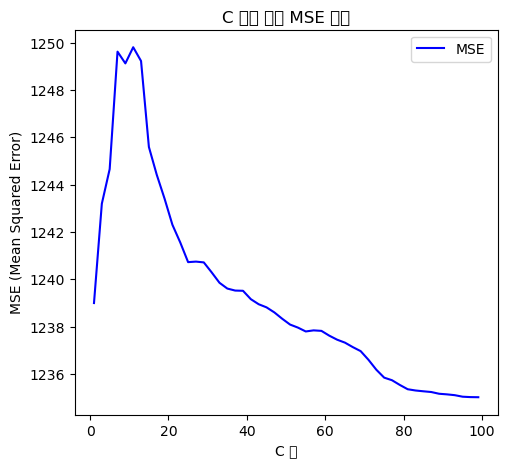

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(C_values, mse_scores, label="MSE", color="blue")
plt.xlabel("C 값")
plt.ylabel("MSE (Mean Squared Error)")
plt.title("C 값에 따른 MSE 변화")
plt.legend()

plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54868 (\

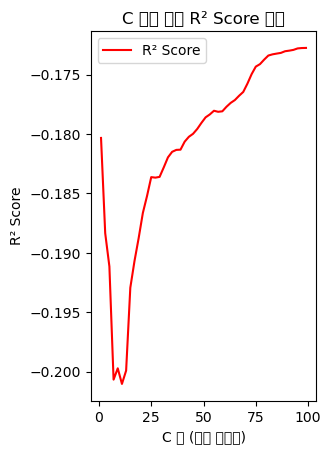

In [31]:
plt.subplot(1, 2, 2)
plt.plot(C_values, r2_scores, label="R² Score", color="red")
plt.xlabel("C 값 (로그 스케일)")
plt.ylabel("R² Score")
plt.title("C 값에 따른 R² Score 변화")
plt.legend()

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score
mse_scores = []
r2_scores = []

for x in range (1, 1000, 10):

    model=SVR(kernel='poly',C=x)

    X_sample = X_train_scaled[:10000]
    y_sample = y_train[:10000]
    model.fit(X_sample, y_sample)
    
    pred_train=model.predict(X_sample)
    pred_train
    
    test_sample=y_test[:10000]
    mae = root_mean_squared_error(test_sample, pred_train)  # RMSE
    mse = root_mean_squared_error(test_sample, pred_train)
    r2 = r2_score(test_sample, pred_train)

    mse_scores.append(mse)
    r2_scores.append(r2) 